In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

## Question 1

In [5]:
def f_question(t,s):
    return s

In [6]:
def f(t, s):
    return np.exp(t)

In [19]:
# Runge-Kutta from question 1.
def rk4(f, t0, x0, tau, n, output = False):
    traj = np.zeros(n+1)
    tt = []
    h = ((tau - t0) / n)
    
    traj[0] = x0
    
    t = t0
    tt.append(t)
    for ii in range(n):
        
        K1 = h * f(t, traj[ii])
        K2 = h * f(t + h/2, traj[ii] + K1/2)
        K3 = h * f(t + h/2, traj[ii] + K2/2)
        K4 = h * f(t + h, traj[ii] + K3)
        
        traj[ii + 1] = traj[ii] + (K1/6) + (K2/3) + (K3/3) + (K4/6)
        t =  t + h

        if output == True:
            print(traj[ii+1], t, h)
        tt.append(t)
    
    return traj, tt

In [4]:
def rk4(f, t0, x0, tau, n):
    traj = np.zeros(n+1)
    h = ((tau - t0) / n)
    
    traj[0] = x0
    
    t = t0
    
    for ii in range(n):
        
        K1 = h * f(t, traj[ii])
        K2 = h * f(t + h/2, traj[ii] + K1/2)
        K3 = h * f(t + h/2, traj[ii] + K2/2)
        K4 = h * f(t + h, traj[ii] + K3)
        
        traj[ii + 1] = traj[ii] + (K1/6) + (K2/3) + (K3/3) + (K4/6)
        t =  t + h
    
    return traj

In [44]:
t0 = 0
x0 = 1
tau = 5
N = [1, 2, 4, 8, 16, 32, 64]

In [45]:
sols = []
times = []
prev_sol = 1
for i, n in enumerate(N):
    h = ((tau - t0) / n)
    sol, time = rk4(f_question, t0, x0, tau, n, False)
    sols.append(sol)
    times.append(time)
    
    table[i,0] = n
    table[i,1] = h
    table[i,2] = sol[-1]
    table[i,3] = abs(sol[-1] - np.exp(1))
    table[i,4] = abs(sol[-1] - prev_sol)
    if i>1:
        table[i,5] = abs(sol[-1] - prev_sol) / abs(prev_sol - table[i-2,5])
    prev_sol=sol[-1]

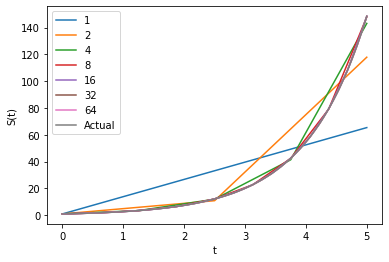

In [49]:
for ii in range(len(sols)):
    
    plt.plot(times[ii], sols[ii], label = N[ii])

plt.plot(np.linspace(0,5,100), np.exp(np.linspace(0,5,100)), label = 'Actual')    
plt.legend()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.savefig("figures/various_grids.pdf",dpi=300)  
plt.show()

### Question 2: Right function

In [11]:
sol = rk4(f_question, t0, x0, tau, n)

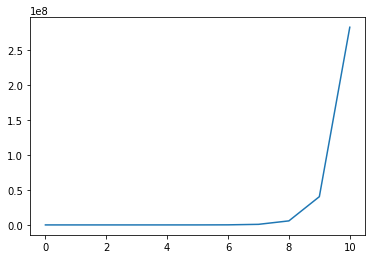

In [12]:
plt.plot(sol)

In [13]:
y_true = np.exp(tt)

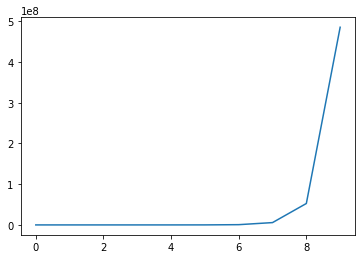

In [14]:
plt.plot(y_true)

In [15]:
ret = integrate.odeint(f_question, x0, tt, tfirst=True)

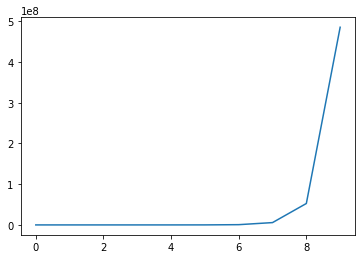

In [16]:
plt.plot(ret)

In [17]:
# Difference of factor 2?

# Question 2

In [51]:
N = [1, 2, 4, 8, 16, 32, 64]
tau = 1

In [52]:
# coluumns:
# n, h, sol, sol-e, sol-prev_sol, abs(sol)/abs(prev_sol)

table = np.zeros((len(N), 6))

In [53]:
sols = []
times = []
prev_sol = 1
for i, n in enumerate(N):
    h = ((tau - t0) / n)
    sol, time = rk4(f_question, t0, x0, tau, n, False)
    sols.append(sol)
    times.append(time)
    
    table[i,0] = n
    table[i,1] = h
    table[i,2] = sol[-1]
    table[i,3] = abs(sol[-1] - np.exp(1))
    table[i,4] = abs(sol[-1] - prev_sol)
    if i>1:
        table[i,5] = abs(sol[-1] - prev_sol) / abs(prev_sol - table[i-2,5])
    prev_sol=sol[-1]

In [54]:
df = pd.DataFrame(table)
df.columns = ['n', 'h','s(1)', 's(1) - e', 'diff', 'ratio']
df

,n,h,s(1),s(1) - e,diff,ratio
0,1.0,1.000000,2.708333,9.948495e-03,1.708333e+00,0.000000e+00
1,2.0,0.500000,2.717346,9.356371e-04,9.012858e-03,0.000000e+00
2,4.0,0.250000,2.718210,7.188926e-05,8.637478e-04,3.178645e-04
3,8.0,0.125000,2.718277,4.984042e-06,6.690522e-05,2.461370e-05
4,16.0,0.062500,2.718282,3.281185e-07,4.655924e-06,1.713022e-06
5,32.0,0.031250,2.718282,2.104785e-08,3.070706e-07,1.129660e-07
6,64.0,0.015625,2.718282,1.332718e-09,1.971514e-08,7.252798e-09


In [55]:
df.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &     n &         h &      s(1) &      s(1) - e &          diff &         ratio \\\\\n\\midrule\n0 &   1.0 &  1.000000 &  2.708333 &  9.948495e-03 &  1.708333e+00 &  0.000000e+00 \\\\\n1 &   2.0 &  0.500000 &  2.717346 &  9.356371e-04 &  9.012858e-03 &  0.000000e+00 \\\\\n2 &   4.0 &  0.250000 &  2.718210 &  7.188926e-05 &  8.637478e-04 &  3.178645e-04 \\\\\n3 &   8.0 &  0.125000 &  2.718277 &  4.984042e-06 &  6.690522e-05 &  2.461370e-05 \\\\\n4 &  16.0 &  0.062500 &  2.718282 &  3.281185e-07 &  4.655924e-06 &  1.713022e-06 \\\\\n5 &  32.0 &  0.031250 &  2.718282 &  2.104785e-08 &  3.070706e-07 &  1.129660e-07 \\\\\n6 &  64.0 &  0.015625 &  2.718282 &  1.332718e-09 &  1.971514e-08 &  7.252798e-09 \\\\\n\\bottomrule\n\\end{tabular}\n'

# Question 3

In [116]:
from scipy import integrate

In [81]:
def f(x1, x2, lmbda = -1, mu = 0):
    return np.array([-x2 , lmbda - mu*x2 - x1**2 - x1*x2])

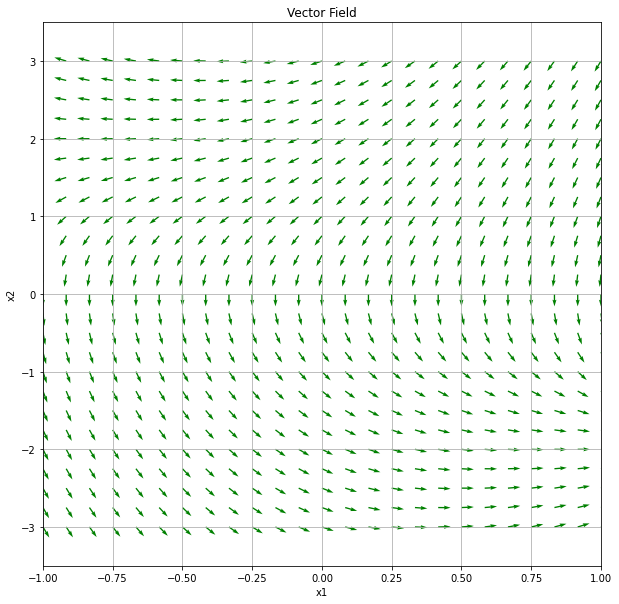

In [83]:
# Meshgrid
n = 25
x_max = 1
x_min = -1

x, y = np.meshgrid(np.linspace(x_min, x_max, n), 
                   np.linspace(-3, 3, n))
  
# Directional vectors
u = f(x,y)[0]
v = f(x,y)[1]

U = u / np.sqrt(u**2 + v**2);
V = v / np.sqrt(u**2 + v**2);
  
# Plotting Vector Field with QUIVER
plt.figure( figsize = (10, 10))
#plt.quiver(x, y, u, v, color='g')
plt.quiver(x, y, U, V, color='g')
#lt.quiver(x, y, np.ones(len(u)), np.ones(len(v)), color='g')
plt.title('Vector Field')
plt.xlabel('x1')
plt.ylabel('x2')
  
# Setting x, y boundary limits
plt.xlim(x_min, x_max)
plt.ylim(-3.5, 3.5)
#plt.savefig("figures/vector_field.pdf",dpi=300)  
# Show plot with grid
plt.grid()
plt.show()

In [60]:
# Stable point = x1 = +sqrt(lambda) x2=0

In [ ]:
# Flikker in runga kutta
rk4(f, t0, x0, tau, n)

#### A) Steady states in vector field

$$
\dot{s} = f(x), 
f(x) = \begin{pmatrix}
-x_2 \\
\lambda - \mu x_2 -x_{1}^{2}-x_{1}x_2
\end{pmatrix}
$$

For a state to be a steady state, the derivative has to be 0. Hence, 
$$
f(x1,x2) = \begin{pmatrix}
0 \\
0
\end{pmatrix}
$$
Thus x2=0. 
$$
\lambda - \mu x_2 - x_{1}^{2}-x_1x_2 = 0 \\
x_2 = 0 \\
x_{1}^{2} = \lambda \\
x_{1}= \pm \sqrt{\lambda}
$$

### B) Region where there are no and 2 steady states
2 steady states:
$$
 \lambda>0
$$

What is lambda = 0? -> 1 steady state <br>
No steady states:
$$
\lambda <0
$$


In [ ]:
def steady_state(mu, lam):
    return lam - 

### C) Stability for the two steady states 

Theory:
$$
s = \bar{x}+y \\
\dot{s} = \dot{y}\\
$$

Taylor Expand
$$
\dot{y} = f(\bar{x})+\frac{\partial f}{\partial{x}}(\bar{x})y+R(y)
$$

Define A
$$
A = \frac{\partial f}{\partial{x}}(\bar{x})
$$

Look at the real part of the eigenvalues to determine the dynamics around the stable points

In our case:
$$
\bar{x} = \begin{pmatrix}
\pm\lambda \\
0
\end{pmatrix},
A = \begin{pmatrix}
\frac{\partial{f_1}}{\partial{x_1}} & \frac{\partial{f_1}}{\partial{x_2}}\\
\frac{\partial{f_2}}{\partial{x_1}} & \frac{\partial{f_2}}{\partial{x_2}}
\end{pmatrix} = \begin{pmatrix}
0 & 1\\
-2x_1-x_2 & -\mu-x_1
\end{pmatrix}
$$

Then, the eigenvalues are:
$$
0=det(A - \kappa I)=\begin{pmatrix}
0-\kappa & 1\\
-2x_1-x_2 & -\mu-x_1-\kappa
\end{pmatrix}
$$

Considered at the positive stable point
$$
0=det(A - \kappa I)=\begin{pmatrix}
0-\kappa & 1\\
-2\sqrt{\lambda} & -\mu-\sqrt{\lambda}-\kappa
\end{pmatrix}\\
=-\kappa(-\mu-\sqrt{\lambda}-\kappa)+2\sqrt{\lambda}\\
=\kappa^2-\kappa\mu-\kappa\sqrt{\lambda}+2\sqrt{\lambda}
$$

Solve for $\kappa$
$$
\kappa=\frac{1}{2}(-\sqrt{\lambda}-\mu\pm\sqrt{\lambda+\mu^2+2\sqrt{\lambda}(4+\mu)})
$$

Considered at the negative stable point
$$
0=det(A - \kappa I)=\begin{pmatrix}
0-\kappa & 1\\
2\sqrt{\lambda} & -\mu+\sqrt{\lambda}-\kappa
\end{pmatrix}\\
=-\kappa(-\mu+\sqrt{\lambda}-\kappa)-2\sqrt{\lambda}\\
=\kappa^2-\kappa\mu+\kappa\sqrt{\lambda}-2\sqrt{\lambda}
$$

Solve for $\kappa$
$$
\kappa=\frac{1}{2}(-\sqrt{\lambda}-\mu\pm\sqrt{\lambda+\mu^2-2\sqrt{\lambda}(4+\mu)})
$$


## Question 4

In [120]:
lambdas = 0.25
mus = [0.55, 0.45, 0.35]
t0 = 0
T = 160
N = 64

In [125]:
def ff(x1, x2):
    #return lam - mu*x2 - x1**2 - x1*x2
    return x1

In [126]:
x1 = 0.49999
lam = 0.25

In [127]:
mu = 0.55
sol55, time = rk4(ff, t0, 0, T, N)

mu = 0.45
sol45, time = rk4(ff, t0, 0, T, N)

mu = 0.35
sol35, time = rk4(ff, t0, 0, T, N)

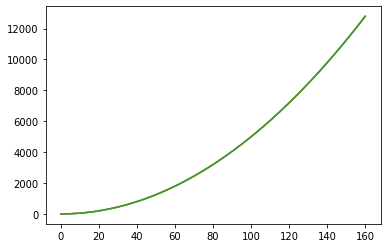

In [128]:
plt.plot(time, sol55)
plt.plot(time, sol45)
plt.plot(time, sol35)